# 1 . Chargement et Exploration de Données

In [91]:
import pandas as pd

# Charger le dataset

data=pd.read_csv('DA-Technical Case.csv')

In [92]:
# Afficher les premières lignes et résumer les caractéristiques
print(data.head())
print(data.info())
print(data.describe())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

# 2. Prétraitement des Données

# a)Vérification des valeurs manquantes

In [93]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values)


Valeurs manquantes par colonne :
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [94]:
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)


# Interprétation :

Les valeurs manquantes sont remplacées par le mode des colonnes catégorielles.

# b)Encodage des colonnes catégorielles

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [96]:
data.dropna(axis=0, inplace=True) #pour remplacer les valeurs manquantes
data['Parental_Involvement'].replace(['Low','Medium'],[0,1], inplace=True)
data['Access_to_Resources'].replace(['Medium','High'],[0,1], inplace=True)
data['Extracurricular_Activities'].replace(['No','Yes'],[0,1], inplace=True)
data['Motivation_Level'].replace(['Low','Medium'],[0,1], inplace=True)
data['Internet_Access'].replace(['No','Yes'],[0,1], inplace=True)
data['Family_Income'].replace(['Low','Medium'],[0,1], inplace=True)
data['Teacher_Quality'].replace(['Medium','High'],[0,1], inplace=True)
data['Peer_Influence'].replace(['Neutral','Positive','Negative'],[0,1,-1], inplace=True)
data['Learning_Disabilities'].replace(['No','Yes'],[0,1], inplace=True)
data['Parental_Education_Level'].replace(['College','High School','Postgraduate'],[0,1,2], inplace=True)
data['Distance_from_Home'].replace(['Near','Moderate'],[0,1], inplace=True)
data['Gender'].replace(['Male','Female'],[0,1], inplace=True)
data['School_Type'].replace(['Private','Public'],[0,1], inplace=True)



In [97]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [66]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,1,0,7,73,0,1,0,0,0,1,1,3,0,1,0,0,67
1,19,64,0,0,0,8,59,0,1,2,1,0,1,-1,4,0,0,1,1,61
2,24,98,1,0,1,7,91,1,1,2,1,0,1,0,4,0,2,0,0,74
3,29,89,0,0,1,8,98,1,1,1,1,0,1,-1,4,0,1,1,0,71
4,19,92,1,0,1,6,65,1,1,3,1,1,1,0,4,0,0,0,1,70


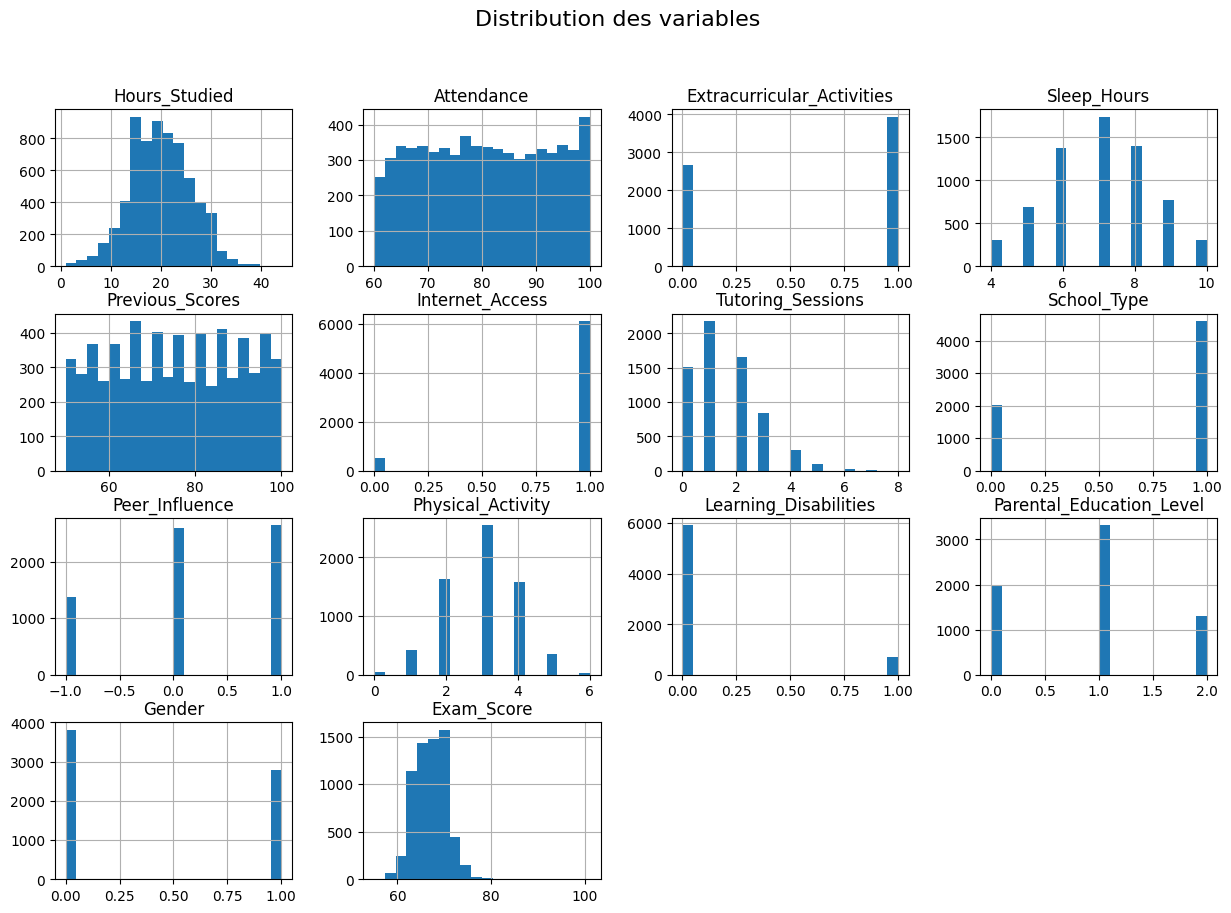

In [67]:
# Histogramme des caractéristiques
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution des variables", size=16)
plt.show()

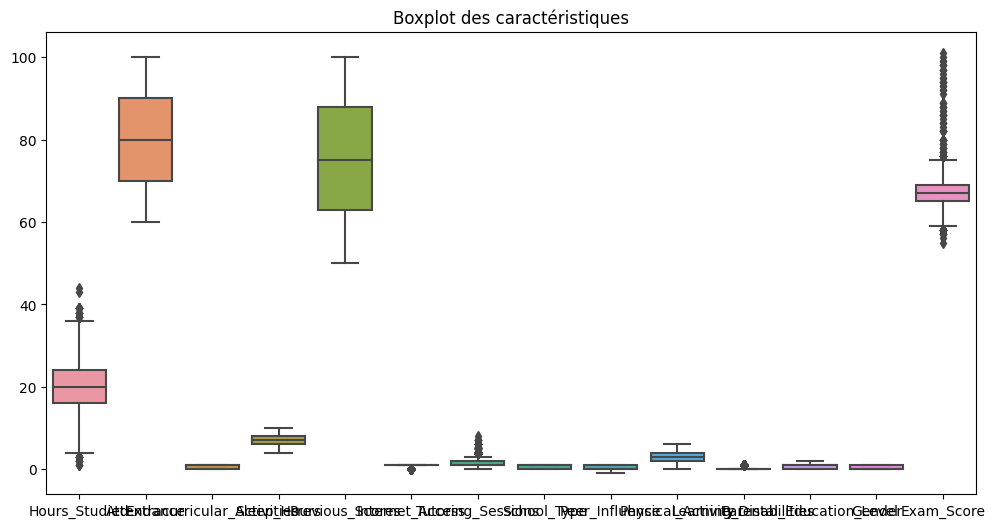

In [68]:
# Box plots pour repérer les valeurs aberrantes
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.title("Boxplot des caractéristiques")
plt.show()

# 3. Séparation des Données

In [117]:
# Définir les caractéristiques (features) et la cible (target)

from sklearn.model_selection import train_test_split
X = data.drop(columns=['Exam_Score'])  # Caractéristiques
y = data['Exam_Score']                 # Cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Interprétation :

La variable Exam_Score est définie comme la cible à prédire, et les autres variables sont utilisées comme caractéristiques pour la modélisation.

#  4.Choix et Entraînement du Modèle

In [118]:
data= data.dropna(axis=1)

In [103]:
print(X_train.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Extracurricular_Activities     int64
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access                int64
Tutoring_Sessions              int64
Family_Income                 object
Physical_Activity              int64
Learning_Disabilities          int64
Teacher_Quality_0              uint8
Teacher_Quality_1              uint8
Teacher_Quality_Low            uint8
School_Type_0                  uint8
School_Type_1                  uint8
Peer_Influence_-1              uint8
Peer_Influence_0               uint8
Peer_Influence_1               uint8
Distance_from_Home_0           uint8
Distance_from_Home_1           uint8
Distance_from_Home_Far         uint8
Gender_0                       uint8
Gender_1                       uint8
Parental_Education_Level_0     uint8
Parental_Education_Level_1     uint8
P

In [122]:
print(X_train['Parental_Involvement'].unique())
print(X_train['Motivation_Level'].unique())
print(X_train['Family_Income'].unique())

[0 2 1]
[2 1 0]
[0 1 2]


In [123]:
X_train['Parental_Involvement'] = X_train['Parental_Involvement'].replace('High', 2)
X_train['Motivation_Level'] = X_train['Motivation_Level'].replace('High', 2)
X_train['Family_Income'] = X_train['Family_Income'].replace('High', 2)

In [124]:
print(X_train['Parental_Involvement'].unique())
print(X_train['Motivation_Level'].unique())
print(X_train['Family_Income'].unique())

[0 2 1]
[2 1 0]
[0 1 2]


In [127]:
#Convertir les colonnes catégorielles restantes en variables indicatrices
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Aligner X_train et X_test pour avoir les mêmes colonnes
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Vérifier les types des colonnes
print(X_train.dtypes)  # Toutes les colonnes devraient être 'int' ou 'float'

# Initialiser le modèle
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# Entraîner le modèle
model.fit(X_train, y_train)

Hours_Studied                 int64
Attendance                    int64
Parental_Involvement          int64
Extracurricular_Activities    int64
Sleep_Hours                   int64
Previous_Scores               int64
Motivation_Level              int64
Internet_Access               int64
Tutoring_Sessions             int64
Family_Income                 int64
School_Type                   int64
Peer_Influence                int64
Physical_Activity             int64
Learning_Disabilities         int64
Parental_Education_Level      int64
Gender                        int64
Access_to_Resources_0         uint8
Access_to_Resources_1         uint8
Access_to_Resources_Low       uint8
Teacher_Quality_0             uint8
Teacher_Quality_1             uint8
Teacher_Quality_Low           uint8
Distance_from_Home_0          uint8
Distance_from_Home_1          uint8
Distance_from_Home_Far        uint8
dtype: object


GradientBoostingRegressor()

# 5.Évaluation du Modèle 

In [128]:
# Prédictions sur l'ensemble de test
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation (RMSE et R²)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


RMSE: 2.439128421158831
R^2 Score: 0.5791073964250698


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Modèle de Régression par Forêt Aléatoire

In [133]:
# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Calcul des métriques d'évaluation (RMSE et R²)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Afficher les résultats
print(f"RMSE avec Random Forest Regressor: {rmse_rf}")
print(f"R² Score avec Random Forest Regressor: {r2_rf}")

RMSE avec Random Forest Regressor: 2.4034763810093063
R² Score avec Random Forest Regressor: 0.5913216062329276


# Modèle de Régression Linéaire Amélioré avec Ridge et Lasso

In [134]:
# Initialiser les modèles Ridge et Lasso
ridge_model = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha pour optimiser la régularisation
lasso_model = Lasso(alpha=0.1)

# Entraîner les modèles Ridge et Lasso
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
http://localhost:8888/notebooks/Desktop/test/Untitled.ipynb?kernel_name=python3#Mod%C3%A8le-de-R%C3%A9gression-Lin%C3%A9aire-Am%C3%A9lior%C3%A9-avec-Ridge
# Prédictions avec Ridge et Lasso
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calcul des métriques d'évaluation pour Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calcul des métriques d'évaluation pour Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Afficher les résultats
print(f"RMSE avec Ridge Regression: {rmse_ridge}")
print(f"R² Score avec Ridge Regression: {r2_ridge}\n")

print(f"RMSE avec Lasso Regression: {rmse_lasso}")
print(f"R² Score avec Lasso Regression: {r2_lasso}")

RMSE avec Ridge Regression: 2.8207832582371433
R² Score avec Ridge Regression: 0.43708684867953695

RMSE avec Lasso Regression: 2.5357616288330505
R² Score avec Lasso Regression: 0.5450969883232608


In [135]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialiser le modèle XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test)

# Calcul des métriques d'évaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Afficher les résultats
print(f"RMSE avec XGBoost: {rmse_xgb}")
print(f"R² Score avec XGBoost: {r2_xgb}")

RMSE avec XGBoost: 2.6222440722530655
R² Score avec XGBoost: 0.5135388242562136


In [137]:
pip install catboost


     -------------------------------------- 101.8/101.8 MB 1.6 MB/s eta 0:00:00


In [138]:
from catboost import CatBoostRegressor

# Initialiser le modèle CatBoost
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Entraîner le modèle
catboost_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_catboost = catboost_model.predict(X_test)

# Calcul des métriques d'évaluation
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
r2_catboost = r2_score(y_test, y_pred_catboost)

# Afficher les résultats
print(f"RMSE avec CatBoost: {rmse_catboost}")
print(f"R² Score avec CatBoost: {r2_catboost}")

RMSE avec CatBoost: 2.5607238382957123
R² Score avec CatBoost: 0.5360967134398893


# Résultats des Modèles

Random Forest Regressor:RMSE: 2.4035 R² Score: 0.5913

Ridge Regression RMSE: 2.8208 R² Score: 0.4371

Lasso Regression RMSE: 2.5358 R² Score: 0.5451

XGBoost RMSE: 2.6222 R² Score: 0.5135

CatBoost RMSE: 2.5607 R² Score: 0.5361 

Le Random Forest Regressor a la meilleure performance avec le plus bas RMSE (2.4035) et le R² le plus élevé (0.5913). Cela signifie qu'il explique mieux la variance des données cibles par rapport aux autres modèles.

            



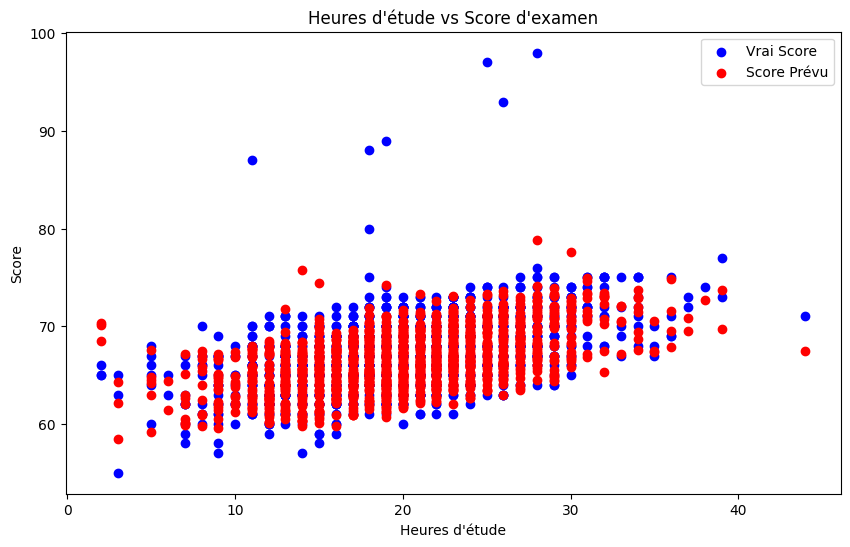

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Vrai Score')
plt.scatter(X_test['Hours_Studied'], y_pred_rf, color='red', label='Score Prévu')
plt.xlabel('Heures d\'étude')
plt.ylabel('Score')
plt.title('Heures d\'étude vs Score d\'examen')
plt.legend()
plt.show()